### Import Library dan Dataset

In [8]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('../data/insurance.csv')

### Pemahaman terhadap Data

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Pre-Processing Data

In [12]:
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Mendefinisikan Fitur dan Target

In [13]:
y = df_processed['charges']
X = df_processed.drop('charges', axis=1)

feature_names = X.columns

### Membagi Data Training dan Tes

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linier Regression

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Uji Data Training

In [17]:
y_pred = model.predict(X_test_scaled)

### Evaluasi Model

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R-squared (R²): 0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19


### Visualisasi

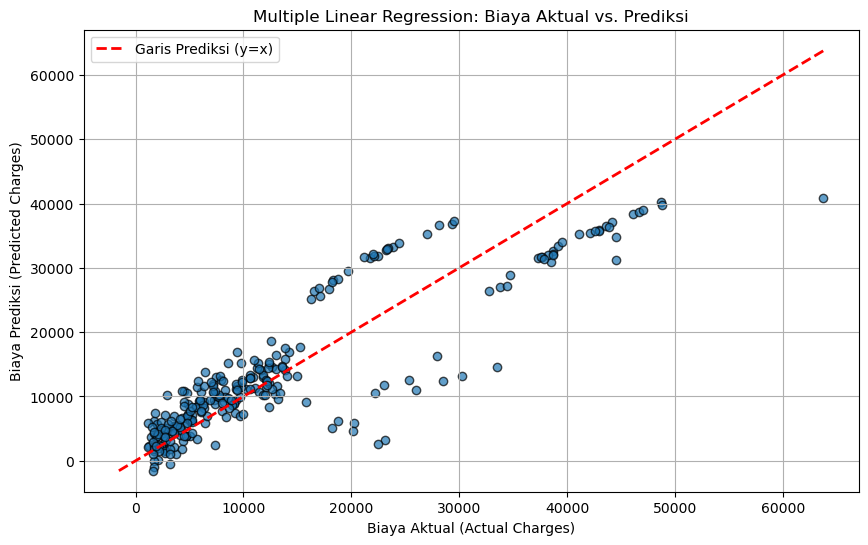

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')

# Menambahkan garis prediksi sempurna (y=x)
line_coords = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(line_coords, line_coords, color='red', linestyle='--', lw=2, label='Garis Prediksi (y=x)')

plt.xlabel("Biaya Aktual (Actual Charges)")
plt.ylabel("Biaya Prediksi (Predicted Charges)")
plt.title("Multiple Linear Regression: Biaya Aktual vs. Prediksi")
plt.legend()
plt.grid(True)
plt.savefig("mlr_actual_vs_predicted.png")